# Table of Contents

#### 1. Import libraries and data
#### 2. Adding 'Region' to JSON
#### 3. Data Wrangling
#### 4. Data Cleaning
            Missing Values
            Duplicate Values
            Extreme Values Check
#### 5. Create a choropleth map using a variable of your choice
            Choloropleth map of average yields per region
                Analysis
            Choloropleth map of max yields per region
                Analysis
            Cholorpleth map of sum of yields per region
                Analysis
            Choloropleth map of average rainfall per region
                Analysis
            Choloropleth map of sum records of fertilizer used per region
                Analysis
            Choloropleth map of sum records of irrigation used per region
                Analysis

### 1. Import libraries and data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\02 Data\Original Data\us-states.json"'

In [4]:
# To view the JSON file contents here too:

f = open(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\02 Data\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [18]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [9]:
# import data set
df_crop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'crop_yield_v2.pkl'))

In [10]:
df_crop.shape

(1000000, 13)

In [11]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
 10  Rainfall_group          1000000 non-null  object 
 11  Temperature_range       1000000 non-null  object 
 12  Harvest_range           1000000 non-null  object 
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 

In [12]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_group,Temperature_range,Harvest_range
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Very High,Warm,Extended Harvest
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,Very High,Cool,Extended Harvest
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Very Low,Warm,Long-Term Harvest
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,Very High,Cool,Extended Harvest
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,High,Hot,Long-Term Harvest


In [13]:
df_crop.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649518
std,259.851320,7.220608,25.953412,1.696443
min,100.000896,15.000034,60.000000,0.000000
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


### 2. Adding 'Region' to JSON

In [9]:
# Create a dictionary mapping regions to state abbreviations
state_to_region = {
    "West": ['AZ', 'CO', 'ID', 'NM', 'MT', 'UT', 'NV', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA'],
    "South": ['DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    "East": ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    "North": ['IN', 'IL', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
}

# Add a region field to each state in the JSON based on the dictionary
for feature in data['features']:
    state_abbr = feature['id']  # Get state abbreviation
    # Find the region for this state abbreviation
    for region, states in state_to_region.items():
        if state_abbr in states:
            feature['properties']['Region'] = region
            break
    else:
        # If no region is found, assign a default value or leave blank
        feature['properties']['Region'] = 'Unknown'

In [10]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama', 'Region': 'South'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.13702

In [13]:
# Specify the path for the updated JSON file
updated_json_path = r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\02 Data\Prepared Data\us-states-updated.json'

# Ensure the directory exists
os.makedirs(os.path.dirname(updated_json_path), exist_ok=True)

# Write the updated data back to a JSON file
with open(updated_json_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)  # Pretty print the JSON

print(f"Updated JSON file saved to: {updated_json_path}")

Updated JSON file saved to: C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\02 Data\Prepared Data\us-states-updated.json


### 3. Data Wrangling

No columns to remove, I am keeping all the variables to analyze per region.

### 4. Data Cleaning

#### Missing Values

In [20]:
# check for missing values

df_crop.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
Rainfall_group            0
Temperature_range         0
Harvest_range             0
dtype: int64

No missing values in the dataset

#### Duplicate Values

In [23]:
# check for duplicate values

dups = df_crop.duplicated()

In [24]:
print(dups)

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


In [25]:
# view duplicated rows

duplicated_rows = df_crop[df_crop.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare, Rainfall_group, Temperature_range, Harvest_range]
Index: []


There are duplicated values, but no duplicated rows in the database.

#### Extreme values check

<Axes: xlabel='Region', ylabel='Count'>

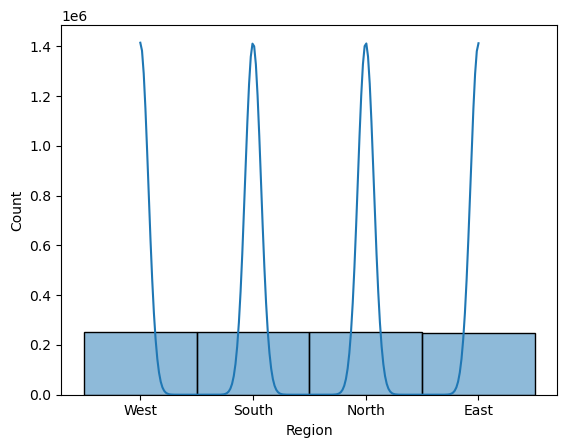

In [28]:
sns.histplot(df_crop['Region'], bins=20, kde = True) # shows extreme values for 'Region'

<Axes: xlabel='Soil_Type', ylabel='Count'>

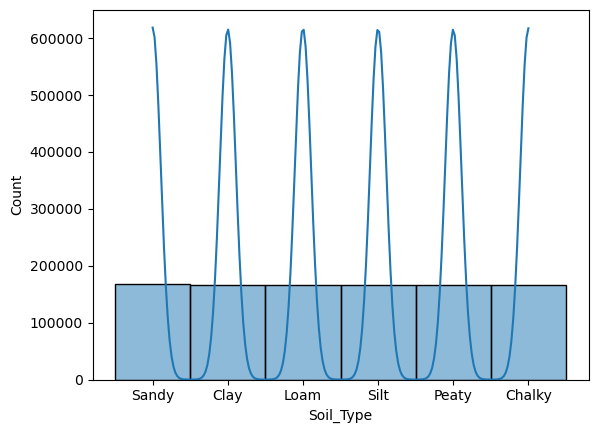

In [29]:
sns.histplot(df_crop['Soil_Type'], bins=20, kde = True) # shows extreme values for 'Soil_Type'

<Axes: xlabel='Yield_tons_per_hectare', ylabel='Count'>

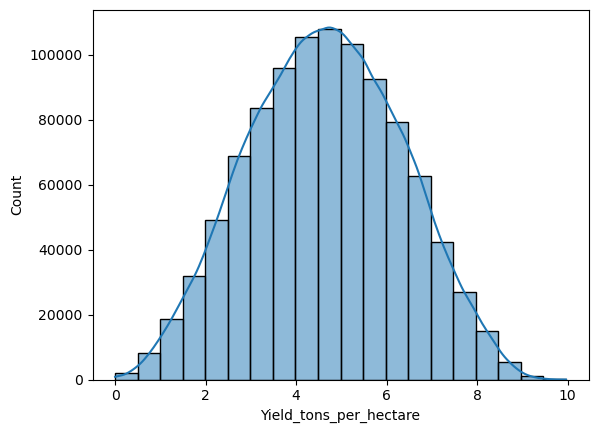

In [30]:
sns.histplot(df_crop['Yield_tons_per_hectare'], bins=20, kde = True) # shows extreme values for 'Yield_tons_per_hectare'

All of the variables, other than 'Yield_tons_per_hectare' have a split distribution where they are all very close in value. The 'Yield_tons_per_hectare' has an even distribution, maxing out at ~9.96.

### 5. Create a choropleth map using a variable of your choice

#### Choloropleth map of average yields per region

In [34]:
# Create a data frame with average of yield grouped by Region

average_yield_region = df_crop.groupby('Region')['Yield_tons_per_hectare'].mean()
average_yield_region.head()

Region
East     4.645635
North    4.654163
South    4.648883
West     4.649381
Name: Yield_tons_per_hectare, dtype: float64

In [36]:
# Setup a folium map at a high-level zoom
average_yield_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = average_yield_region,
    columns = ['Region', 'Yield_tons_per_hectare'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "yield").add_to(average_yield_map)
folium.LayerControl().add_to(average_yield_map)

average_yield_map

In [44]:
# Save the Folium map with a corrected file path
average_yield_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\average_yield_map.html')

#### Analysis

1. This map shows that the northern region provides the highest yield on average, but only by a small margin. Although the difference is minimal, it might indicate slight variations in factors like soil quality or type, climate, or agricultural practices between the regions. There is something about the northern region that has slightly higher yields.
2. Question: How does crop yield vary across different regions? The northern region has the largest average and largest sum (in map below) of crop yields across regions.

#### Additional Questions

1. Since the yields are closely clustered, the opportunity might lie in identifying areas where small adjustments (e.g., optimizing irrigation, crop type, soil type or fertilizer use) could further enhance yields, particularly in regions with slightly lower averages like the East.

#### Choloropleth map of max yields per region

In [47]:
# Create a data frame with max yield grouped by Region

max_yield_region = df_crop.groupby('Region')['Yield_tons_per_hectare'].max()
max_yield_region.head()

Region
East     9.802534
North    9.949207
South    9.963372
West     9.952983
Name: Yield_tons_per_hectare, dtype: float64

In [100]:
# Setup a folium map at a high-level zoom
max_yield_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = max_yield_region,
    columns = ['Region', 'Yield_tons_per_hectare'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "max yield").add_to(max_yield_map)
folium.LayerControl().add_to(max_yield_map)

max_yield_map

In [102]:
# Save the Folium map with a corrected file path
max_yield_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\max_yield_map.html')

#### Analysis

1. The map above shows the max crop yield per region. It shows that the east region provided the smallest maximum yield across the regions. This aligns with the lowest crop average across the regions where the eastern region has been the lowest in both.
2. Highest Yielding Region: The South has the highest maximum crop yield at 9.963 tons per hectare, slightly outperforming the other regions. This might indicate that the South has areas with optimal conditions (e.g., soil, climate, agricultural practices) for crop production.

#### Choloropleth map of sum yields per region

In [86]:
# Create a data frame with the sum of yield grouped by Region
sum_yield_region = df_crop.groupby('Region')['Yield_tons_per_hectare'].sum()

# Display the first few rows of the sum_yield_region DataFrame
sum_yield_region.head()

Region
East     1.160010e+06
North    1.164346e+06
South    1.162472e+06
West     1.162689e+06
Name: Yield_tons_per_hectare, dtype: float64

In [104]:
# Setup a folium map at a high-level zoom
sum_yield_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = sum_yield_region,
    columns = ['Region', 'Yield_tons_per_hectare'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "sum yield").add_to(sum_yield_map)
folium.LayerControl().add_to(sum_yield_map)

sum_yield_map

In [106]:
# Save the Folium map with a corrected file path
sum_yield_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\sum_yield_map.html')

#### Analysis

1. The map above shows the sums of yields per region. The northern region slightly outperforms the southern and western regions, but the largest observation is that the eastern region is significantly lower than the other three.
2. Impact of Land Area on Total Yield: The dataset provided doesn't show this but I could explore whether the total crop yield in each region is influenced by the amount of land under cultivation. Regions like the North might have larger agricultural areas, contributing to its slightly higher total yield. Comparing crop yield per hectare could provide further insight into efficiency and productivity if the data set allowed.

#### Choloropleth map of average rainfall per region

In [59]:
# Create a data frame with the average rainfall grouped by Region
mean_rainfall_region = df_crop.groupby('Region')['Rainfall_mm'].mean()

# Display the first few rows of the sum_yield_region DataFrame
mean_rainfall_region.head()

Region
East     549.243755
North    550.793416
South    550.013776
West     549.875231
Name: Rainfall_mm, dtype: float64

In [63]:
# Setup a folium map at a high-level zoom
average_rainfall_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = mean_rainfall_region,
    columns = ['Region', 'Rainfall_mm'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "average rainfall").add_to(average_rainfall_map)
folium.LayerControl().add_to(average_rainfall_map)

average_rainfall_map

In [65]:
# Save the Folium map with a corrected file path
average_rainfall_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\average_rainfall_map.html')

#### Analysis

The largest insight here is that the northern region has the highest average rainfall and also the highest average crop yield. And vice versa for the eastern region. There is a noticeable positive correlation between average rainfall and average yield.

#### Choloropleth map of sum records of fertilizer used per region

In [68]:
# Filter the DataFrame to only include rows where 'Fertilizer_Used' is True
df_fertilizer_true = df_crop[df_crop['Fertilizer_Used'] == True]

# Create a data frame with the sum of fertilizer use grouped by Region
sum_fertilizer_true = df_fertilizer_true.groupby('Region')['Fertilizer_Used'].sum()

# Display the first few rows of the sum_fertilizer_true DataFrame
sum_fertilizer_true.head()

Region
East     124779
North    124934
South    125135
West     125092
Name: Fertilizer_Used, dtype: int64

In [69]:
# Filter the DataFrame to only include rows where 'Fertilizer_Used' is False
df_fertilizer_false = df_crop[df_crop['Fertilizer_Used'] == False]

# Create a data frame with the sum of records where fertilizer was not used, grouped by Region
sum_fertilizer_false = df_fertilizer_false.groupby('Region')['Fertilizer_Used'].sum()

# Display the first few rows of the sum_fertilizer_false DataFrame
sum_fertilizer_false.head()

Region
East     0
North    0
South    0
West     0
Name: Fertilizer_Used, dtype: int64

In [72]:
# Setup a folium map at a high-level zoom
fertilizer_used_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = sum_fertilizer_true,
    columns = ['Region', 'Fertilizer_Used'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Fertilizer Used totals").add_to(fertilizer_used_map)
folium.LayerControl().add_to(fertilizer_used_map)

fertilizer_used_map

In [74]:
# Save the Folium map with a corrected file path
fertilizer_used_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\fertilizer_used_map.html')

#### Analysis

1. The eastern region has the lowest use of fertilizers and aligns with the lowest average yield. There may be a slight correlation there.
2. High consistency in fertilizer use across regions: The south has the highest number of records for fertilizer use at 125,135, while the east has the lowest at 124,779. However, the variation in the number of records is minimal, indicating that fertilizer usage is consistent across all regions.

### Choloropleth map of Irrigation used per region

In [77]:
# Filter the DataFrame to only include rows where 'Irrigation_Used' is True
df_irrigation_true = df_crop[df_crop['Irrigation_Used'] == True]

# Create a data frame with the sum of irrigation use grouped by Region
sum_irrigation_true = df_irrigation_true.groupby('Region')['Irrigation_Used'].sum()

# Display the first few rows of the sum_irrigation_true DataFrame
sum_irrigation_true.head()

Region
East     124704
North    125009
South    124734
West     125044
Name: Irrigation_Used, dtype: int64

In [78]:
# Filter the DataFrame to only include rows where 'Irrigation_Used' is False
df_irrigation_false = df_crop[df_crop['Irrigation_Used'] == False]

# Create a data frame with the sum of records where irrigation was not used, grouped by Region
sum_irrigation_false = df_fertilizer_false.groupby('Region')['Irrigation_Used'].sum()

# Display the first few rows of the sum_irrigation_false DataFrame
sum_fertilizer_false.head()

Region
East     0
North    0
South    0
West     0
Name: Fertilizer_Used, dtype: int64

In [81]:
# Setup a folium map at a high-level zoom
irrigation_used_map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data, 
    data = sum_irrigation_true,
    columns = ['Region', 'Irrigation_Used'],
    key_on = 'feature.properties.Region', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Irrigation Used Totals").add_to(irrigation_used_map)
folium.LayerControl().add_to(irrigation_used_map)

irrigation_used_map

In [83]:
# Save the Folium map with a corrected file path
irrigation_used_map.save(r'C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\irrigation_used_map.html')

#### Analysis

Irrigation as a standard agricultural practice: The consistent usage of irrigation across regions suggests that it is a standard agricultural input for crop cultivation in the United States. This may imply that regardless of the region's rainfall levels, irrigation is commonly used to maintain optimal soil moisture and crop yields.

In [121]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_group,Temperature_range,Harvest_range
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Very High,Warm,Extended Harvest
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,Very High,Cool,Extended Harvest
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Very Low,Warm,Long-Term Harvest
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,Very High,Cool,Extended Harvest
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,High,Hot,Long-Term Harvest


In [123]:
df_crop.shape

(1000000, 13)